# 데이터 결합
- 데이터를 분석하기 위해 두 개 이상의 테이블을 하나의 테이블로 결합해야 하는 경우
1) 단순 연결(Concat, Append)
2) key를 기준으로 연겨하는 조인 (Join, Merge)

### 1. 단순 연결 (Concat)
- 두 개 이상의 데이터프레임을 열 or 행 방향 그대로 붙임
- DataFrame 간의 연결, DataFrame + Series, Series + Series 

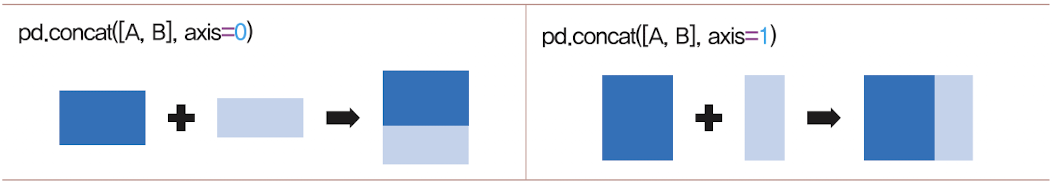

In [ ]:
import pandas as pd
HR1 = pd.DataFrame({
    '이름': ['장화', '홍련'],
    '부서': ['영업', '회계'],
    '직급': ['팀장', '사원'],
})

HR2 = pd.DataFrame({
    '이름': ['콩쥐', '팥쥐'],
    '부서': ['영업', '인사'],
    '직급': ['사원', '팀장'],
})

# pd.concat([HR1, HR2], axis=0)

pd.concat([HR1, HR2], axis=0, ignore_index=True)


,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원
2,콩쥐,영업,사원
3,팥쥐,인사,팀장


In [6]:
HR3 = pd.DataFrame({
    '이름': ['콩쥐', '팥쥐'],
    '부서': ['영업', '인사'],
    '급여': [3000, 2800],
})

pd.concat([HR1, HR3], axis=0, ignore_index=True)


,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,NaN
2,콩쥐,영업,NaN,3000.0
3,팥쥐,인사,NaN,2800.0


In [8]:
HR4 = pd.Series({1: 2500}, name='급여')
pd.concat([HR1, HR4], axis=1)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,2500.0


In [9]:
HR5 = pd.DataFrame({'급여': [4500, 3000, 3500]})
pd.concat([HR1, HR5], axis=1)

,이름,부서,직급,급여
0,장화,영업,팀장,4500
1,홍련,회계,사원,3000
2,NaN,NaN,NaN,3500


### 2. 조인 (Join, Merge)
- 두 데이터프레임이 동시에 가지고 있는 특정한 컬럼의 값을 기준으로 두 개 이상의 데이터프레임을 결합하여 하나의 데이터 프레임으로 만드는 것
- 두 데이터 프레임이 동시에 갖고 있는 컬럼 : 
    - 컬럼명이 같다 (X)
    - 컬럼이 가질 수 있는 값의 집합인 도메인이 같다 (O)
    - 이 컬럼의 값을 key라고 하며, 이를 기준으로 1:1, 1:M, M:M 결합을 할 수 있다.


In [ ]:
product = pd.DataFrame({
    '상품코드': ['G1', 'G2', 'G3', 'G4'],
    '상품명': ['우유', '감자', '빵', '치킨']
})

sale = pd.DataFrame({
    '주문번호': [1001, 1002, 1002, 1003, 1004],
    '상품코드': ['G4', 'G3', 'G1', 'G3', 'G5'],
    '주문수량': [1, 4, 2, 2, 3]
})

# 컬럼 - 컬럼 기준
sale.merge(product, on='상품코드', how='inner')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1002,G1,2,우유
3,1003,G3,2,빵


In [ ]:
# 에러남 : 인덱스 - 인덱스 기준 -> 뭔소린지 모르겠음. 근데 대부분 merge만 쓰는듯
# sale.join(product, on='상품코드', how='inner')

ValueError: You are trying to merge on object and int64 columns for key '상품코드'. If you wish to proceed you should use pd.concat

In [12]:
sale.merge(product, on='상품코드', how='outer', sort=True)

,주문번호,상품코드,주문수량,상품명
0,1002.0,G1,2.0,우유
1,NaN,G2,NaN,감자
2,1002.0,G3,4.0,빵
3,1003.0,G3,2.0,빵
4,1001.0,G4,1.0,치킨
5,1004.0,G5,3.0,NaN


In [13]:
sale.merge(product, left_on='상품코드', right_on='상품코드', how='left')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1002,G1,2,우유
3,1003,G3,2,빵
4,1004,G5,3,NaN
